In [1]:
import os

os.chdir("..")

In [2]:
import torch
from src.pipeline_qwen_omini_image_edit import QwenOminiImageEditPipeline
from PIL import Image
from utils import optimise_image_condition
from diffusers import QwenImageEditPipeline
from src.qwen_omini_image_edit_utils import forward
import types


In [3]:
!export HF_HUB_CACHE=./cache

In [4]:
pipeline = QwenOminiImageEditPipeline.from_pretrained("Qwen/Qwen-Image-Edit")
# pipeline = QwenImageEditPipeline.from_pretrained("Qwen/Qwen-Image-Edit")
# pipeline = QwenOminiImageEditPipeline.from_pretrained("ovedrive/qwen-image-edit-4bit")
print("pipeline loaded")
pipeline.to(torch.bfloat16)
pipeline.to("cuda")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

pipeline loaded


QwenOminiImageEditPipeline {
  "_class_name": "QwenOminiImageEditPipeline",
  "_diffusers_version": "0.35.1",
  "_name_or_path": "Qwen/Qwen-Image-Edit",
  "processor": [
    "transformers",
    "Qwen2VLProcessor"
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "Qwen2_5_VLForConditionalGeneration"
  ],
  "tokenizer": [
    "transformers",
    "Qwen2Tokenizer"
  ],
  "transformer": [
    "diffusers",
    "QwenImageTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKLQwenImage"
  ]
}

In [5]:
# pipeline.set_progress_bar_config(disable=None)

In [6]:

# pipeline.transformer.forward = types.MethodType(forward, pipeline.transformer)

In [7]:
image.size

(1392, 752)

In [5]:
image = Image.open("assets/scene_01.png").convert("RGB")
reference = Image.open("assets/spatial_reference_scene_01_boy_01.png").convert("RGB")

width, height = image.size


prompt = "Add a boy to the image."


seed = torch.Generator().manual_seed(42)

# inputs = {
#     "image": image,
#     "prompt": prompt,
#     # "reference": reference,
#     # "reference_delta": [0,0,96],
#     "generator": seed,
#     "true_cfg_scale": 4.0,
#     "negative_prompt": " ",
#     "num_inference_steps": 20,
# }

# with torch.inference_mode():
#     output = pipeline(**inputs)
#     output_image = output.images[0]
#     output_image.save("output_image_edit.png")
#     print("image saved at", os.path.abspath("output_image_edit.png"))



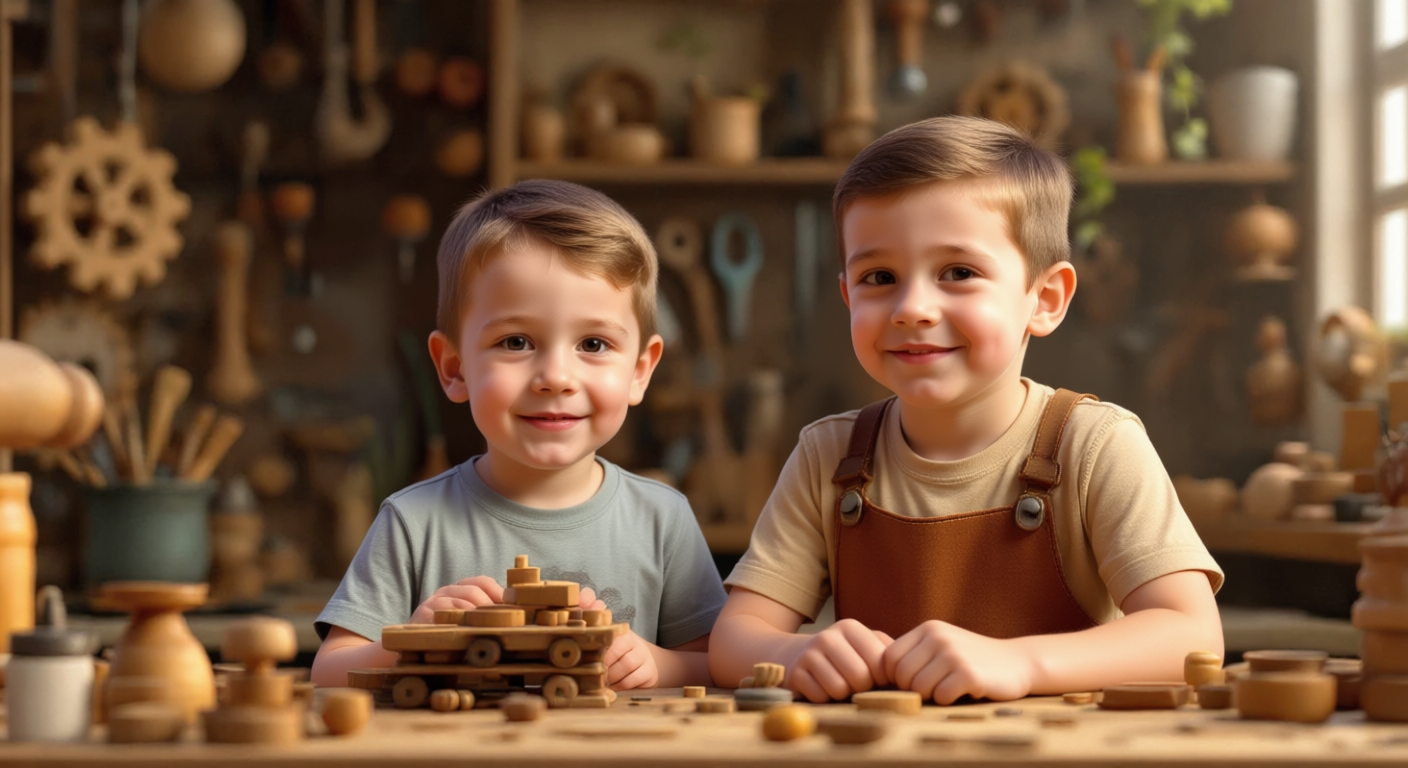

In [6]:
output_image

In [6]:
pipeline.load_lora_weights(
    "saquiboye/omini-kontext",
    weight_name="qwen/character_spatial_500_1.safetensors",
    adapter_name="lora_weight"
)
# pipeline.load_lora_weights(
#     "flymy-ai/qwen-image-edit-inscene-lora",
#     weight_name="flymy_qwen_image_edit_inscene_lora.safetensors",
#     adapter_name="lora_weight"
# )

qwen/character_spatial_500_1.safetensors:   0%|          | 0.00/47.2M [00:00<?, ?B/s]

In [23]:
pipeline.set_adapters("lora_weight", adapter_weights=1.0)

In [14]:
print(image.size, reference.size)

(1392, 752) (1392, 752)


In [15]:
seed = torch.Generator().manual_seed(42)
reference_delta = [1, 0, 0]

# optimised_reference, reference_delta = optimise_image_condition(reference, reference_delta)

prompt = "Add the boy to the image. The boy is looking at the man."


seed = torch.Generator().manual_seed(42)

inputs = {
    "image": image,
    "prompt": prompt,
    "reference": reference,
    "reference_delta": reference_delta,
    "generator": seed,
    "true_cfg_scale": 4.0,
    "negative_prompt": " ",
    "num_inference_steps": 20,
}

with torch.inference_mode():
    output = pipeline(**inputs)
    output_image = output.images[0]
    output_image.save("output_image_edit.png")
    print("image saved at", os.path.abspath("output_image_edit.png"))

  0%|          | 0/20 [00:00<?, ?it/s]

image saved at /workspace/omini-kontext/output_image_edit.png


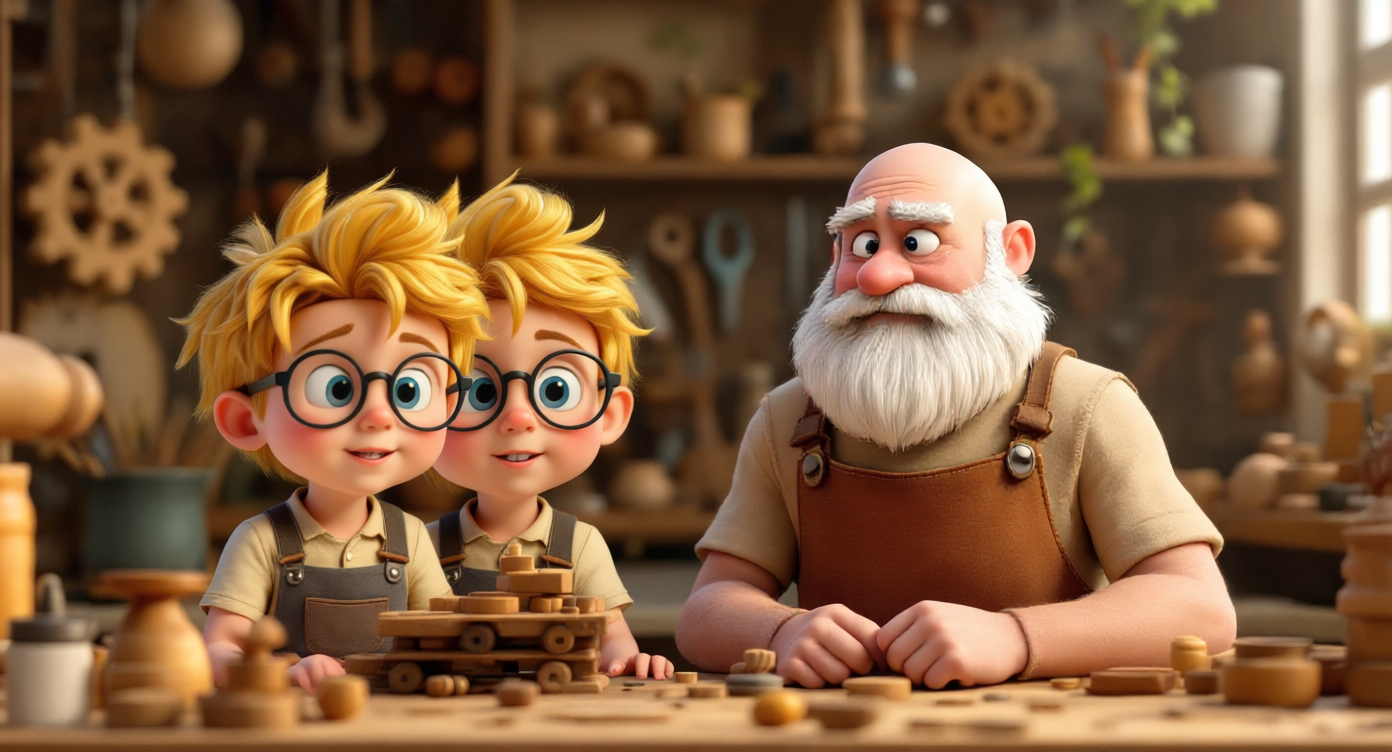

In [16]:
output_image

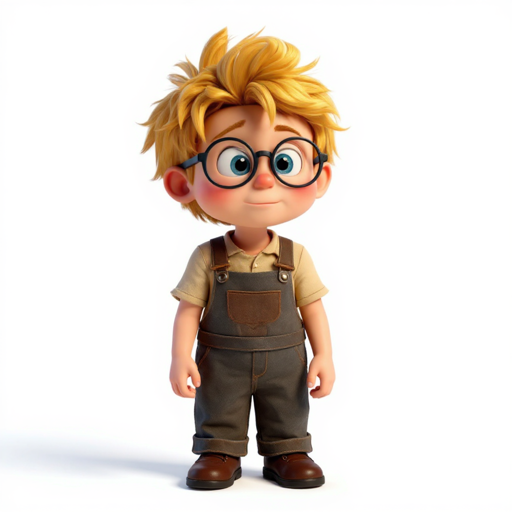

In [12]:
reference